In [1]:
import bs4
import matplotlib.pyplot as plt
import os
import tqdm
import re

def parse_book(filepath):
    book_parsed = bs4.BeautifulSoup(open(filepath, "rb").read())
    originals = book_parsed.find_all("p", {"class": "original"})
    translations = book_parsed.find_all("p", {"class": "translation"})
    if len(translations) > 0:
        return originals
    else:
        return []


books_dir = os.path.join("data", "books")
data = []
for filename in tqdm.tqdm(os.listdir(books_dir)):
    data += parse_book(os.path.join(books_dir, filename))

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1067/1067 [03:38<00:00,  4.87it/s]


In [2]:
# 14781
len(data), data[20]

(14790,
 <p class="original">Неронъ
 рече: «Что есть учение Христово, твоего учителя?» Рече Павелъ: «О учении моего
 Учителя, о немже въпрашаеши, не внемлють вси, но токмо чистии сердцемъ и вѣрою
 приступающеи <i>к нему<a href="#_edn34" name="_ednref34" title=""><b>[34]</b></a>
 </i>— и еликоже есть, к смирению и любве — сему научи <i>Господь. </i>И азъ от
 Иерусалима и да иже до Лирика<a href="#_edn35" name="_ednref35" title="">[35]</a>
 исполних убо словесе мирнаго, якоже от него навыкох. Научих честию другъ друга
 болша творити; имущаа богатство не възноситися, ни уповати на богатство
 погыбнущее, но на Бога полагати упование свое; убогыа въ своемъ убожествѣ
 радоватися. Отца научих наказовати чада своа въ страсѣ Божии, чадомъ слушати
 родителя въ учении спасенаго пути. Научих же и церкви невѣрных вѣровати, въ
 единаго Бога Отца Вседръжителя, невидима и непостижима,<a href="#_edn36" name="_ednref36" title="">[36]</a>
 и въ Сына его единароднаго Господа нашего Исуса Христа. Се же мое

(array([287., 284., 275., 250., 215., 244., 256., 246., 216., 222.]),
 array([ 0. ,  9.9, 19.8, 29.7, 39.6, 49.5, 59.4, 69.3, 79.2, 89.1, 99. ]),
 <BarContainer object of 10 artists>)

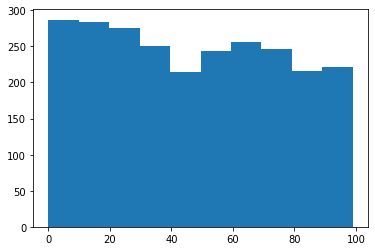

In [3]:
plt.hist([len(i.text) for i in data if len(i.text) < 100])

In [4]:
for tag in data:
    if len(tag.text) < 10:
        print(tag.text)

О ФИНИЯНѢ
О КУПѢЛИ
О ЕРДАНЪ
О ТОМ ЖЕ
О РАМѢ
О ЛИДДѢ
О ОПИИ
Чюдо 1-е
Чюдо 2-е
Чюдо 3-е
Чюдо 4-е
Чюдо 5-е
Чюдо 6-е
Чюдо 7-е
Чюдо 8-е
Чюдо 9-е
Чюдо 10-е
Чюдо 11-е
Чюдо 12-е
Чюдо 13-е
Чюдо 14-е
Чюдо 15-е
Чюдо 16-е
О гладу
1 небо
2 небо
3 небо
4 небо
5 небо
6 небо
7 небо
 
I
II
III
IV
V
VI
 
 
 
 
 
 
О лици
I
II
III
IV
<...>
<...>
<...>
<...>
<...>
<...>
<...>
<...>
<...>
<...>
<...>
<...>
<...>
<...>
<...>
<...>
<…>
<...>
<...>
<…>
О ПРАВДѣ
О УДОБЬИ
О МОЛИТВѣ
О СТРАСТИ
О СЪНѣ
О КРАСОТѣ
О СЛАВѣ
О ВРАЧѣХЪ
О ПАМЯТИ
О ЗАВИСТИ
О ЗАКОНѣ
О БЕЗУМЬИ
О СМѣСѣ
О СЪНѣ
О СМЕРТИ
О ЖЕНАХЪ
СЛОВО 3
(...)
 
 
 
Грамота
О ВЫЛАСКѢ
О СЛУХѢХЪ
ГЛАВА 198
ГЛАВА 202
ГЛАВА 203
ГЛАВА 204
О МИСИИ
ГЛАВА 206
26 НОЯБРЯ
17 МАРТА
Аминь.
ИНО ЧЮДО
ИНО ЧЮДО
ИНО ЧЮДО
ИНО ЧЮДО
ИНО ЧЮДО
ИНО ЧЮДО
ИНО ЧЮДО
СЛОВО 1
1 ОКТЯБРЯ
 
 
 
 
 
Слово 55
Слово 98
Слово 99
Слово 119
Слово 134
Слово 148
Слово 234
Слово 258
Слово 266
Слово 270
Слово 271
Слово 284
Чюдо
3.
ПРОЛОГ
Аминь.
<...>
ГЛАВА 2
(...)
(...)
(...)
 
(...)
(...)
 
ПОУЧЕНЬЕ
 
 


In [5]:
import random, re

def prepare_text(tag):
    txt = tag.text
    pattern = r'\[\d+\]'
    txt = txt.replace("\r", "")
    txt = txt.replace("\n", "")
    return re.sub(pattern, '', txt)


data_prepared = [prepare_text(tag) for tag in data]
random.shuffle(data_prepared)

In [6]:
with open(os.path.join("data", "oldrussian.txt"), "w") as f:
    for txt in data_prepared:
        print(txt, file=f)

In [8]:
! wc -l oldrussian.txt

wc: oldrussian.txt: No such file or directory
